<div style='background-image: url("./title01.png") ; padding: 0px ; background-size: cover ; border-radius: 5px ; height: 200px'>
<div style="float: right ; margin: 50px ; padding: 20px ; background: rgba(255 , 255 , 255 , 0.7) ; width: 50% ; height: 150px">
<div style="position: relative ; top: 50% ; transform: translatey(-50%)">
            <div style="font-size: xx-large ; font-weight: 900 ; color: rgba(0 , 0 , 0 , 0.8) ; line-height: 100%">Computers, Waves, Simulations</div>
            <div style="font-size: large ; padding-top: 20px ; color: rgba(0 , 0 , 0 , 0.5)">The Finite Element Method - Elastic Wave Equation 1D</div>
        </div>
    </div>
</div>

This notebook covers the following aspects:
* Initialize and setup of the finite element solution for the 1D wave equation
* Define the Mass Matrix and Stiffness Matrix and visually inspect their structure
* Implementation of a finite difference scheme for comparision with the finite element scheme
* The finite element solution using the computed mass matrix M and stiffness matrix K 


# BÀI TẬP LỚN CUỐI KỲ MÔN PHƯƠNG PHÁP SỐ GIẢI PTĐHR

## Câu 1: 
Xét phương trình dạng sóng đàn hồi 1D
\begin{equation}
\rho(x) \partial_t^2 u(x,t) = \partial_x (\mu(x) \partial_x u(x,t)) + f(x,t).
\end{equation}
Nhân cả hai vế của phương trình trên với $\varphi_j$ rồi lấy tích phân hai vế, ta được

\begin{equation}
\int_D \rho(x) \partial_t^2 u(x,t) \varphi_j \, dx = \int_D \partial_x (\mu(x) \partial_x u(x,t)) \varphi_j \, dx + \int_D f(x, t) \varphi_j \, dx.
\end{equation}
Sử dụng công thức nguyên hàm từng phần, ta có
\begin{equation}
\int_D \partial_x (\mu(x) \partial_x u(x,t)) \varphi_j \, dx = \left( \mu \partial_x u (x, t) \varphi_j \right) - \int_D \mu \partial_x u(x, t) \partial_x \varphi_j \, dx.
\end{equation}
Do đó
\begin{equation}
\int_D \rho(x) \partial_t^2 u(x,t) \varphi_j \, dx + \int_D \mu \partial_x u(x, t) \partial_x \varphi_j \, dx = \int_D f(x, t) \varphi_j \, dx.
\end{equation}
Với hàm 
$$ u(x, t) \rightarrow \overline{u}(x, t) = \sum\limits_{i = 1}^N u_i(t) \varphi_i(x) $$
Khi đó, phương trình trên trở thành
\begin{eqnarray}
&& \int_D \rho(x) \partial_t^2 \overline{u}(x,t) \varphi_j \, dx + \int_D \mu \partial_x \overline{u}(x, t) \partial_x \varphi_j \, dx = \int_D f(x, t) \varphi_j \, dx\\
& \Leftrightarrow & \int_D \rho(x) \partial_t^2 \sum\limits_{i = 1}^N u_i(t) \varphi_i(x)  \varphi_j \, dx + \int_D \mu \partial_x \sum\limits_{i = 1}^N u_i(t) \varphi_i(x)  \partial_x \varphi_j \, dx = \int_D f(x, t) \varphi_j \, dx \\
& \Leftrightarrow & \sum\limits_{i = 1}^N \partial_t^2 u_i(t) \int_D \rho(x)  \varphi_i(x)  \varphi_j \, dx + \sum\limits_{i = 1}^N u_i(t) \int_D \mu \partial_x \varphi_i(x)  \partial_x \varphi_j \, dx = \int_D f(x, t) \varphi_j \, dx.
\end{eqnarray}
Với

\begin{eqnarray}
&& u(t) \rightarrow u_i(t)\\
&& M \rightarrow M_{ij} = \int_D \rho \varphi_i \varphi_j \, dx \\
&& K \rightarrow K_{ij} = \int_D \partial_x \varphi_i \partial_x \varphi_j \, dx \\
&& f \rightarrow f_{j} = \int_D f(x, t) \varphi_j \, dx 
\end{eqnarray}
Suy ra, ta thu được phương trình dạng
$$ M^T \partial_t^2 u + K^T u = f.$$
Sử dụng công thức sai phân

$$ \partial_t^2 u \approx \frac{u(t + dt) - 2u(t) + u(t - dt)}{dt^2}$$
ta suy ra
$$ M^T \left[ \frac{u(t + dt) - 2u(t) + u(t - dt)}{dt^2} \right] = f - K^T u $$
hay
\begin{equation}
\mathbf{u}(t + dt) = dt^2 (\mathbf{M}^T)^{-1}[\mathbf{f} - \mathbf{K}^T\mathbf{u}] + 2\mathbf{u} - \mathbf{u}(t-dt).
\end{equation}

Gọi $\xi = x - x_i$, $h = x_{i + 1} - x_i$ và định nghĩa
$$ \varphi_i(\xi) = \left\lbrace \begin{array}{ll}
\frac{\xi}{h_{i - 1}}+ 1 & -h_{i - 1} \leq \xi \leq 0 \\ 
1 - \frac{\xi}{h_i} & 0 \leq \xi \leq h_i \\
0 & \text{nếu khác}.
\end{array}  \right. $$

Do đó

$$ \partial_\xi \varphi_i(\xi) = \left\lbrace \begin{array}{ll}
\frac{1}{h_{i - 1}} & -h_{i - 1} \leq \xi \leq 0 \\ 
- \frac{1}{h_i} & 0 \leq \xi \leq h_i \\
0 & \text{nếu khác}.
\end{array}  \right. $$

## Ma trận trọng $M$

Thực hiện phép đổi biến số theo $\xi$, ta thu được

$$ M_{ii}  = \int_{D_\xi} \rho \varphi_i \varphi_j \, d\xi = \rho\int_{-h_{i - 1}}^0 \left( \frac{\xi}{h_{i - 1}} + 1\right)^2 d\xi + \rho\int_{0}^{h_i} \left( 1 - \frac{\xi}{h_{i}}\right)^2 d\xi = \frac{1}{3} \left( \rho h_{i - 1} + \rho h_i \right).$$

$$ M_{i, i-1} = \rho \int_{-h_{i - 1}}^0 \left( \frac{\xi}{h_{i - 1}} + 1 \right) \frac{-\xi}{h_{i - 1}}\, d\xi = \frac{1}{6} \rho h_{i - 1} $$
và 
$$ M_{i, i+1} = \rho \int_{0}^{h_i} \left(1 - \frac{\xi}{h_{i}} \right) \frac{\xi}{h_{i}}\, d\xi = \frac{1}{6} \rho h_{i} $$

Suy ra, trong trường hợp bước đi $h$ đều thì ma trận trọng $M$ có dạng

\begin{equation}
M = M_{ij} = \frac{\rho h}{6}
 \begin{pmatrix}
   \ddots  &    &    &    & 0\\
   1 & 4 &  1 &    &  \\
     & 1 &  4 &  1 &  \\
     &   &  1 &  4 & 1\\
   0 &   &    &    &  \ddots
 \end{pmatrix} 
\end{equation}

Tuy nhiên, trong câu hỏi này, bước đi $h$ không đều với

$$ h = h_i = \left\lbrace \begin{array}{ll}
40 & 1 \leq i \leq 115 \\ 
10 & 116 \leq i \leq 216 \\
20 & 217 \leq i \leq 447.
\end{array}  \right. $$

Do đó, ma trận $M$ có dạng

\begin{equation}
M = M_{ij} = \frac{\rho}{6}
 \begin{pmatrix}
   \ddots  &    &    &    & 0\\
   h_{i - 1} & 2h_{i - 1} + 2h_i &  h_i &    &  \\
     & h_{i} & 2h_{i} + 2h_{i + 1} &  h_{i + 1} &  \\
     &   &  h_{i + 1} & 2h_{i + 1} + 2h_{i + 2} &  h_{i + 2}\\
   0 &   &    &    &  \ddots
 \end{pmatrix} 
\end{equation}


### Ma trận độ cứng $K$

Dạng tổng quát của ma trận độ cứng là

\begin{equation}
K = K_{ij} = \int_{D} \mu \partial_x\varphi_i \partial_x\varphi_j dx = \int_{D_{\xi}} \mu \partial_\xi\varphi_i \partial_\xi\varphi_j d\xi
\end{equation} 

Suy ra

$$ K_{ii}  = \int_{D_{\xi}} \mu \partial_\xi\varphi_i \partial_\xi\varphi_i d\xi = \mu \int_{-h_{i - 1}}^0 \left( \frac{1}{h_{i - 1}}\right)^2 d\xi + \mu \int_{0}^{h_i} \left( \frac{1}{h_{i}}\right)^2 d\xi = \frac{\mu}{h_{i - 1}} + \frac{\mu}{h_{i}}, $$
$$ K_{i, i - 1} = \int_{D_{\xi}} \mu \partial_\xi\varphi_i \partial_\xi\varphi_{i - 1} d\xi = -\frac{\mu}{h_{i - 1}},$$
$$ K_{i, i + 1} = \int_{D_{\xi}} \mu \partial_\xi\varphi_i \partial_\xi\varphi_{i + 1} d\xi = -\frac{\mu}{h_{i}},$$

Do đó, ma trận độ cứng cần tìm có dạng

\begin{equation}
K = K_{ij} = \mu
 \begin{pmatrix}
   \ddots  &    &    &    & 0\\
  -h_{i - 1} & h_{i - 1} + h_i & -h_i &    &  \\
     & -h_{i} & h_i + h_{i + 1} & -h_{i + 1} &  \\
     &   & -h_{i + 1} & h_{i + 1} + h_{i + 2} & -h_{i + 2} \\
   0 &   &    &    &  \ddots
 \end{pmatrix} 
\end{equation}








In [1]:
# Import all necessary libraries, this is a configuration step for the exercise.
# Please run it before the simulation code!
import numpy as np
import matplotlib
# Show Plot in The Notebook
matplotlib.use("nbagg")
import matplotlib.pyplot as plt
import matplotlib.animation as animation


### 1. Initialization of setup

In [2]:
# Initialization of setup
# ---------------------------------------------------------------
# Basic parameters
nx1 = 116
nx2 = 100
nx3 = 230
nx = nx1 + nx2 + nx3

xmax  = 10200  # Physical dimension [m]

vs1   = 6000
vs2   = 1500
vs3   = 3000

#Vận tốc sóng
c = np.zeros((nx, nx))
c += vs3
c[:, 0:116] *= 2
c[:, 116 : 216] /= 2   

cmax = c.max()

ro0   = 2500    # Density [kg/m^3]
nt    = 18000    # Number of time steps
isx   = 223     # Source location [m] 
eps   = 0.5     # Stability limit
iplot = 20      # Snapshot frequency

dx = xmax/(nx-1)           # calculate space increment
dx1 = 4600/115
dx2 = 1000/100
dx3 = 4600/230


#x  = np.arange(0, nx)*dx   # initialize space coordinates

x  = np.arange(0, nx)

for i in range(0, 116):
    x[i] = x[i]*dx1
for i in range(116, 216):
    x[i] = 4600 + (x[i] - 115)*dx2
for i in range(216, nx):
    x[i] = 5600 + (x[i] - 215)*dx3    

x  = np.transpose(x)
#print(x)
#print(x[115])
#print(x[215])
#print(x[445])
h = np.diff(x)  # Element sizes [m]

# parameters
ro = np.zeros(nx)
ro += ro0
mu = np.zeros(nx)
for i in range(0, 116):
    mu[i] = mu[i]+ro[i]*vs1**2
for i in range(116, 216):
    mu[i] = mu[i]+ro[i]*vs2**2
for i in range(216, nx):
    mu[i] = mu[i]+ro[i]*vs3**2

#print(mu)
    
# time step from stabiity criterion
dt = 0.5*eps*dx/np.max(np.sqrt(mu/ro))
#dt = 0.0033
# initialize time axis
t   = np.arange(1, nt+1)*dt  

# ---------------------------------------------------------------
# Initialize fields
# ---------------------------------------------------------------
u    = np.zeros(nx)
uold = np.zeros(nx)
unew = np.zeros(nx)


### 2. Source time function

In 1D the propagating signal is an integral of the source time function. As we look for a Gaussian waveform, we initialize the source time function $f(t)$ using the first derivative of a Gaussian function.

\begin{equation}
f(t) = -\dfrac{2}{\sigma^2}(t - t_0)e^{-\dfrac{(t - t_0)^2}{\sigma^2}}
\end{equation}

Initialize a source time function called 'src'.  Use $\sigma = 20 dt$ as Gaussian width, and time shift $t_0 = 3\sigma$. Then, visualize the source in a given plot.

<IPython.core.display.Javascript object>


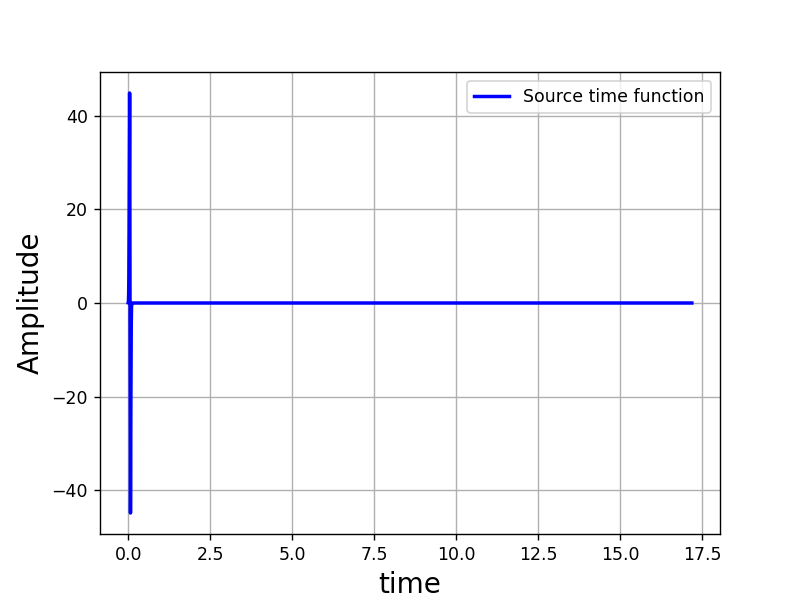

In [3]:
# Initialization of the source time function
# ---------------------------------------------------------------
pt  = 20*dt     # Gaussian width
t0  = 3*pt      # Time shift
src = -2/pt**2 * (t-t0) * np.exp(-1/pt**2 * (t-t0)**2)

# Source vector
# ---------------------------------------------------------------
f = np.zeros(nx); f[isx:isx+1] = f[isx:isx+1] + 1.

# ---------------------------------------------------------------
# Plot source time fuction
# ---------------------------------------------------------------
plt.plot(t, src, color='b', lw=2, label='Source time function')
plt.ylabel('Amplitude', size=16)
plt.xlabel('time', size=16)
plt.legend()
plt.grid(True)
plt.show()

In [4]:
# Mass matrix M_ij
# ---------------------------------------------------------------
#Cau 1:
M = np.zeros((nx,nx), dtype=float)
for i in range(1, nx-1):
    for j in range (1, nx-1):
        if j==i:
            M[i,j] = (ro[i-1]*h[i-1] + ro[i]*h[i])/3
        elif j==i+1:
            M[i,j] = ro[i]*h[i]/6
        elif j==i-1:
            M[i,j] = ro[i-1]*h[i-1]/6
        else:
            M[i,j] = 0    
            
# Corner elements
M[0,0] = ro[0]*h[0]/3
M[nx-1,nx-1] = ro[nx-1]*h[nx-2]/3

# #Cau 2:
# M = np.zeros((nx,nx), dtype=float)
# A = ro[0]*np.array([(2/15+2/15, 1/15, 1/30),(1/15, 8/15, 1/15),(1/30, 1/15, 2/15+2/15)])
# for i in range(0,nx-3,2):
#     M[i:i+3,i:i+3] = A
# #Cac phan tu goc
# M[0,0] /= 2
# M[nx-1,nx-1] = A[1,1]
# M[nx-2,nx-1] = A[0,1]
# M[nx-1,nx-2] = A[1,0]

print(M)
# Invert M
Minv = np.linalg.inv(M)

[[33333.33333333     0.             0.         ...     0.
      0.             0.        ]
 [    0.         66666.66666667 16666.66666667 ...     0.
      0.             0.        ]
 [    0.         16666.66666667 66666.66666667 ...     0.
      0.             0.        ]
 ...
 [    0.             0.             0.         ... 33333.33333333
   8333.33333333     0.        ]
 [    0.             0.             0.         ...  8333.33333333
  33333.33333333     0.        ]
 [    0.             0.             0.         ...     0.
      0.         16666.66666667]]


In [5]:
# Stiffness matrix Kij
# ---------------------------------------------------------------
#Cau 1
K = np.zeros((nx,nx), dtype=float)
for i in range(1, nx-1):
    for j in range(1, nx-1):
        if i==j:
            K[i,j] = mu[i-1]/h[i-1] + mu[i]/h[i]
        elif i==j+1:
            K[i,j] = -mu[i-1]/h[i-1]
        elif i+1==j:
            K[i,j] = -mu[i]/h[i]
        else:
            K[i,j] = 0

K[0,0] = mu[0]/h[0]
K[nx-1,nx-1] = mu[nx-1]/h[nx-2]

# #Cau 2:
# K = np.zeros((nx,nx), dtype=float)
# B = mu[0]*np.array([(7/3+7/3, -8/3, 1/3),(-8/3, 16/3, -8/3),(1/3, -8/3, 7/3+7/3)])
# for i in range(0,nx-3,2):
#     K[i:i+3,i:i+3] = B
# #Cac phan tu goc
# K[0,0] /= 2
# K[nx-1,nx-1] = B[1,1]
# K[nx-2,nx-1] = B[0,1]
# K[nx-1,nx-2] = B[1,0]

print(K)




[[ 2.250e+09  0.000e+00  0.000e+00 ...  0.000e+00  0.000e+00  0.000e+00]
 [ 0.000e+00  4.500e+09 -2.250e+09 ...  0.000e+00  0.000e+00  0.000e+00]
 [ 0.000e+00 -2.250e+09  4.500e+09 ...  0.000e+00  0.000e+00  0.000e+00]
 ...
 [ 0.000e+00  0.000e+00  0.000e+00 ...  2.250e+09 -1.125e+09  0.000e+00]
 [ 0.000e+00  0.000e+00  0.000e+00 ... -1.125e+09  2.250e+09  0.000e+00]
 [ 0.000e+00  0.000e+00  0.000e+00 ...  0.000e+00  0.000e+00  1.125e+09]]


<IPython.core.display.Javascript object>


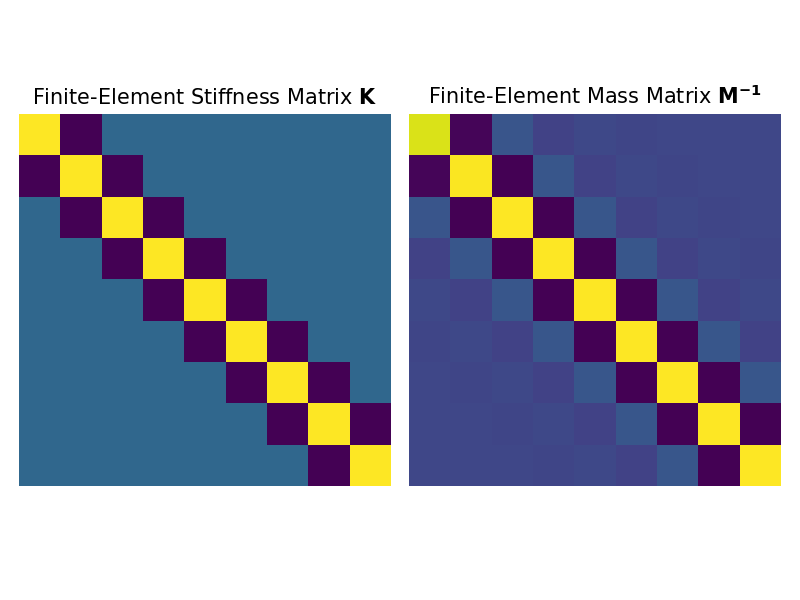

In [6]:
# Display finite element matrices
# ---------------------------------------------------------------
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(K[1:10,1:10])
ax1.set_title('Finite-Element Stiffness Matrix $\mathbf{K}$')
ax1.axis("off")

ax2.imshow(Minv[1:10,1:10])
ax2.set_title('Finite-Element Mass Matrix $\mathbf{M^{-1}}$')
ax2.axis("off")

plt.tight_layout()
plt.show()

### 6. Finite element solution 

Finally we implement the finite element solution using the computed mass $M$ and stiffness $K$ matrices together with a finite differences extrapolation scheme

\begin{equation}
\mathbf{u}(t + dt) = dt^2 (\mathbf{M}^T)^{-1}[\mathbf{f} - \mathbf{K}^T\mathbf{u}] + 2\mathbf{u} - \mathbf{u}(t-dt).
\end{equation}

<IPython.core.display.Javascript object>


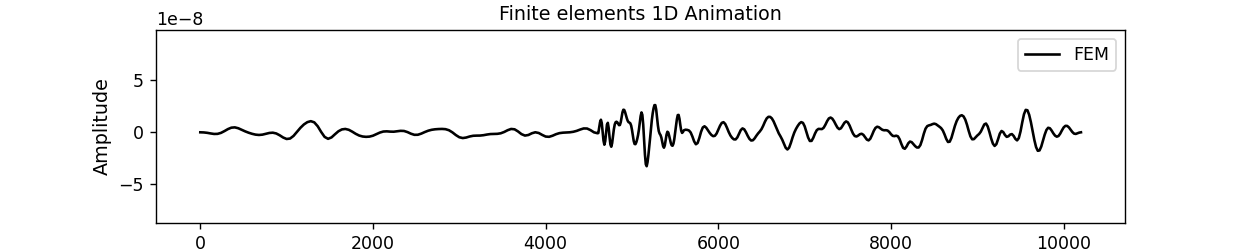

In [7]:
# Initialize animated plot
# ---------------------------------------------------------------
plt.figure(figsize=(10,2))

line1 = plt.plot(x, u, 'k', lw=1.5, label='FEM')
plt.title('Finite elements 1D Animation', fontsize=11)
plt.ylabel('Amplitude', fontsize=11)
plt.xlabel('x (m)', fontsize=11)

plt.ion()   # set interective mode
plt.show()

In [8]:
# ---------------------------------------------------------------
# Time extrapolation
# ---------------------------------------------------------------
for it in range(nt):
    # --------------------------------------
    # Finite Element Method
    unew = (dt**2) * Minv @ (f*src[it]  -  K @ u) + 2*u - uold                         
    uold, u = u, unew
    
    # --------------------------------------
    # Finite Difference Method
#    pnew = (dt**2) * Mfd @ ( f/dx*src[it]+ D @ p) + 2*p - pold
#    pold, p = p, pnew
     
    # --------------------------------------   
    # Animation plot. Display both solutions
    if not it % iplot:
        for l in line1:
            l.remove()
            del l
   #     for l in line2:
   #         l.remove()
   #         del l
        line1 = plt.plot(x, u, 'k', lw=1.5, label='FEM')
   #     line2 = plt.plot(x, p, 'r', lw=1.5, label='FDM')
        plt.legend()
        plt.gcf().canvas.draw()
        

# Câu 2
Với $u(\xi) = c_1 + c_2 \xi + c_3 \xi^2$, trong đó $\xi_{1, 2, 3} = 0, 1/2, 1$ ta thu được
$$ \left\lbrace \begin{array}{l}
u_1 = c_1 \\ 
u_2 = c_1 + 0.5 c_2 + 0.25 c_3 \\
u_3 = c_1 + c_2 + c_3.
\end{array}  \right. $$
Suy ra
$$ u = \left[ \begin{array}{c}
u_1 \\ 
u_2 \\
u_3
\end{array}  \right] = \left[ \begin{array}{ccc}
1 & 0 & 0 \\ 
1 & 1/2 & 1/4 \\
1 & 1 & 1
\end{array}  \right] \cdot \left[ \begin{array}{c}
c_1 \\ 
c_2 \\
c_3
\end{array}  \right] = A \cdot c.$$
Do đó
$$ c =  \left[ \begin{array}{c}
c_1 \\ 
c_2 \\
c_3
\end{array}  \right] = \left[ \begin{array}{ccc}
1 & 0 & 0 \\ 
-3 & -4 & -1 \\
2 & -4 & 2
\end{array}  \right] \cdot \left[ \begin{array}{c}
u_1 \\ 
u_2 \\
u_3
\end{array}  \right] = A^{-1} u.$$
Từ đây ta suy ra
\begin{eqnarray}
u(\xi) & = & c_1 + c_2 \xi + c_3 \xi^2 \\
& = & u_1 (1 - 3\xi + 2\xi^2) + u_2 (4\xi - 4\xi^2) + u_3(-\xi + 2\xi^2) \\
& = & u_1 N_1(\xi) + u_2 N_2(\xi) + u_3 N_3(\xi),
\end{eqnarray}

trong đó: $N_1(\xi) = 1 - 3\xi + 2\xi^2, N_2(\xi) = 4\xi - 4\xi^2, N_3(\xi) = -\xi + 2\xi^2$.\\

Trở lại phương trình dạng sóng đàn hồi 1D

$$ \rho \partial_t^2 u = \partial_x (\mu \partial_x u) + f(x, t) $$

Nhân cả hai vế với các hàm $N_j$ rồi lấy tích phân hai vế, ta được


\begin{equation}
\int_D \rho(x) \partial_t^2 u(x,t) N_j \, dx = \int_D \partial_x (\mu(x) \partial_x u(x,t)) N_j \, dx + \int_D f(x, t) N_j \, dx.
\end{equation}
Sử dụng công thức nguyên hàm từng phần, ta có
\begin{equation}
\int_D \partial_x (\mu(x) \partial_x u(x,t)) N_j \, dx = \left( \mu \partial_x u (x, t) N_j \right) - \int_D \mu \partial_x u(x, t) \partial_x N_j \, dx.
\end{equation}
Do đó
\begin{equation}
\int_D \rho(x) \partial_t^2 u(x,t) N_j \, dx + \int_D \mu \partial_x u(x, t) \partial_x N_j \, dx = \int_D f(x, t) N_j \, dx.
\end{equation}
Với hàm 
$$ u(x, t) \rightarrow \overline{u}(x, t) = \sum\limits_{i = 1}^N u_i(t) N_i(x) $$
Khi đó, phương trình trên trở thành
\begin{eqnarray}
&& \int_D \rho(x) \partial_t^2 \overline{u}(x,t) N_j \, dx + \int_D \mu \partial_x \overline{u}(x, t) \partial_x N_j \, dx = \int_D f(x, t) N_j \, dx\\
& \Leftrightarrow & \int_D \rho(x) \partial_t^2 \sum\limits_{i = 1}^N u_i(t) N_i(x)  N_j(x) \, dx + \int_D \mu \partial_x \sum\limits_{i = 1}^N u_i(t) N_i(x)  \partial_x N_j \, dx = \int_D f(x, t) N_j \, dx \\
& \Leftrightarrow & \sum\limits_{i = 1}^N \partial_t^2 u_i(t) \int_D \rho(x)  N_i(x)  N_j \, dx + \sum\limits_{i = 1}^N u_i(t) \int_D \mu \partial_x N_i(x)  \partial_x N_j \, dx = \int_D f(x, t) N_j \, dx.
\end{eqnarray}
Với

\begin{eqnarray}
&& u(t) \rightarrow u_i(t)\\
&& M \rightarrow M_{ij} = \int_D \rho N_i N_j \, dx \\
&& K \rightarrow K_{ij} = \int_D \partial_x N_i \partial_x N_j \, dx \\
&& f \rightarrow f_{j} = \int_D f(x, t) N_j \, dx 
\end{eqnarray}
Suy ra, ta thu được phương trình dạng
$$ M^T \partial_t^2 u + K^T u = f.$$
Sử dụng công thức sai phân

$$ \partial_t^2 u \approx \frac{u(t + dt) - 2u(t) + u(t - dt)}{dt^2}$$
ta suy ra
$$ M^T \left[ \frac{u(t + dt) - 2u(t) + u(t - dt)}{dt^2} \right] = f - K^T u $$
hay
\begin{equation}
\mathbf{u}(t + dt) = dt^2 (\mathbf{M}^T)^{-1}[\mathbf{f} - \mathbf{K}^T\mathbf{u}] + 2\mathbf{u} - \mathbf{u}(t-dt).
\end{equation}

## Ma trận trọng $M$
Để tính các hệ số của ma trận trọng $M$, ta cần tính các ma trận con địa phương $M^e$ với $e = 1, \cdots, N$ tương ứng với các nút. Cụ thể ta có

$$ M_{ii}^e  = \int_{D_\xi} \rho N_i N_i \, d\xi = \rho\int_{0}^1 \rho \varphi_i^2 \, d\xi,$$

$$ M_{i, i-1}^e = \rho \int_{0}^1 N_i N_{i - 1} \, d\xi,$$
và 
$$ M_{i, i+1}^e = \rho \int_{0}^{1} N_i N_{i + 1} \, d\xi.$$

Từ đây ta tính được

$$ M_{11}^e = \rho \int_0^1 (1 - 3\xi + 2\xi^2)^2 \, d\xi = \frac{2}{15} \rho,$$
$$ M_{22}^e = \rho \int_0^1 (4\xi - 4\xi^2)^2 \, d\xi = \frac{8}{15} \rho, $$
$$ M_{33}^e = \rho \int_0^1 (-\xi + 2\xi^2)^2 \, d\xi  = \frac{2}{15} \rho,$$
$$ M_{12}^e = M_{21}^e = \rho \int_0^1 (1 - 3\xi + 2\xi^2)(4\xi - 4\xi^2)\, d\xi = \frac{1}{15} \rho, $$
$$ M_{13}^e = M_{31}^e = \rho \int_0^1 (1 - 3\xi + 2\xi^2)(-\xi + 2\xi^2)\, d\xi = -\frac{1}{30} \rho,$$
$$ M_{23}^e = M_{23}^e = \rho \int_0^1 (4\xi - 4\xi^2)(-\xi + 2\xi^2)\, d\xi  = \frac{1}{15} \rho.$$

Do đó, ta thu được ma trận trọng $M$ có dạng

\begin{equation}
M = \rho
\begin{pmatrix}
\frac{2}{15} & \frac{1}{15} &\frac{1}{30} &0 &0 &0 &\cdots \\
\frac{1}{15} &\frac{8}{15} & \frac{1}{15} &0 &0 &0 &\cdots \\
\frac{1}{30} & \frac{1}{15} &\frac{2}{15}+\color{red}{\frac{2}{15}} & \color{red}{\frac{1}{15}} &\color{red}{\frac{1}{30}} &0 &\cdots \\
0 &0 &\color{red}{\frac{1}{15}} &\color{red}{\frac{8}{15}} & \color{red}{\frac{1}{15}} &0 &\cdots \\
0 &0 &\color{red}{\frac{1}{30}} & \color{red}{\frac{1}{15}} &\color{red}{\frac{2}{15}}+\color{blue}{\frac{2}{15}} &0 &\cdots \\
\vdots &\vdots &\vdots &\vdots &\vdots &\ddots &\vdots \\
\end{pmatrix}
\end{equation}



### Ma trận độ cứng $K$
Dạng tổng quát của ma trận độ cứng $K$ là

\begin{equation}
K_{ij} = \int_{D} \mu \partial_x\varphi_i \partial_x\varphi_j dx = \int_{D_{\xi}} \mu \partial_\xi\varphi_i \partial_\xi\varphi_j d\xi
\end{equation} 

Tính toán tương tự ma trận trọng $M$, ta có

$$ K_{11}^e = \int_{D_{\xi}} \mu \partial_\xi\varphi_1 \partial_\xi\varphi_1 d\xi = \mu \int_0^1 (-3 + 4\xi)^2\, d\xi = \frac{7\mu}{3};$$

$$ K_{22}^e = \int_{D_{\xi}} \mu \partial_\xi\varphi_2 \partial_\xi\varphi_2 d\xi = \mu \int_0^1 (4 - 8\xi)^2\, d\xi = \frac{16 \mu}{3}; $$

$$ K_{33}^e = \int_{D_{\xi}} \mu \partial_\xi\varphi_3 \partial_\xi\varphi_3 d\xi = \mu \int_0^1 (-1 + 4\xi)^2\, d\xi = \frac{7\mu}{3}; $$

$$ K_{12}^e = K_{21}^e = \int_{D_{\xi}} \mu \partial_\xi\varphi_1 \partial_\xi\varphi_2 d\xi = \mu \int_0^1 (-3 + 4\xi)(4 - 8\xi)\, d\xi = -\frac{8\mu}{3}; $$

$$ K_{13}^e = K_{31}^e = \int_{D_{\xi}} \mu \partial_\xi\varphi_1 \partial_\xi\varphi_3 d\xi = \mu \int_0^1 (-3 + 4\xi)(-1 + 4\xi)\, d\xi = \frac{1\mu}{3}; $$

$$ K_{23}^e = K_{32}^e = \int_{D_{\xi}} \mu \partial_\xi\varphi_2 \partial_\xi\varphi_3 d\xi = \mu\int_0^1 (4 - 8\xi)(-1 + 4\xi) \, d\xi = -\frac{8\mu}{3}.$$

Tương tự như đối với ma trận $M$ ta có

\begin{equation}
K = \mu
\begin{pmatrix}
\frac{7}{3} & -\frac{8}{3} &\frac{1}{3} &0 &0 &0 &\cdots \\
-\frac{8}{3} &\frac{16}{3} & -\frac{8}{3} &0 &0 &0 &\cdots \\
\frac{1}{3} & -\frac{8}{3} &\frac{7}{3}+\color{red}{\frac{7}{3}} & \color{red}{-\frac{8}{3}} &\color{red}{\frac{1}{3}} &0 &\cdots \\
0 &0 & \color{red}{-\frac{8}{3}} &\color{red}{\frac{16}{3}} & \color{red}{-\frac{8}{3}} &0 &\cdots \\
0 &0 &\color{red}{\frac{1}{3}} & \color{red}{-\frac{8}{3}} & \color{red}{\frac{7}{3}} + \color{blue}{\frac{7}{3}} &0 &\cdots \\
\vdots &\vdots &\vdots &\vdots &\vdots &\ddots &\vdots \\
\end{pmatrix}
\end{equation}

